In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn.linear_model as skl_lm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import  r2_score


In [158]:
properties = pd.read_csv(r"data\cleaned\properties.csv")

In [159]:
#Splitting the Data into Training and Testing Sets

# Separate the features and target variable
X = properties.drop("price", axis=1)  # Drop the target variable 'price'
y = properties["price"]  # Set 'price' as the target variable

# Handle missing values
X.fillna("MISSING", inplace=True)  # Fill categorical NaNs with 'MISSING'
y.fillna(y.mean(), inplace=True)  # Fill target variable NaNs with the mean value

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Standardize numeric features (for numerical stability)
scaler = StandardScaler()
numeric_columns = X.select_dtypes(include=["float64", "int64"]).columns
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])


# Split into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("shape of x_train and x_test:", X_train.shape,X_test.shape)

shape of x_train and x_test: (16606, 103) (4152, 103)


In [160]:


reg=skl_lm.LinearRegression()

X = properties.total_area_sqm.values.reshape(-1, 1)  # Assuming 'price' is the target variable

y = properties.price

reg.fit(X_train,y_train)



LinearRegression()

In [161]:
reg.intercept_

-21339884619419.688

In [162]:
reg.coef_

array([-4.57692753e+03, -8.76128242e+04,  3.48575954e+04,  2.57811516e+05,
        3.02287238e+04,  7.56558257e+03,  2.38731320e+04,  1.63395967e+04,
       -6.77984935e+02, -9.89067467e+01, -3.68645611e+03,  2.14146927e+15,
        4.41721304e+15, -1.41134724e+15, -4.96293159e+14, -1.41134724e+15,
       -4.18906772e+14,  4.05527314e+15, -4.96293159e+14,  3.31716070e+04,
       -4.18906772e+14, -3.65881305e+15,  6.41522389e+04,  1.32127884e+05,
        3.49006500e+15, -1.39538362e+15,  6.53028381e+14, -4.18906773e+14,
       -4.18906772e+14,  3.49006500e+15,  6.53028381e+14, -1.39538362e+15,
       -1.41134724e+15,  4.41721304e+15, -4.96293159e+14, -4.96293159e+14,
       -3.65881305e+15, -1.41134724e+15, -4.61387449e+15, -4.18906772e+14,
        2.10492188e+04, -3.65881305e+15, -4.18906772e+14,  3.22638750e+04,
       -4.96293159e+14, -4.96293159e+14, -4.18906772e+14, -1.39538362e+15,
       -4.96293159e+14,  4.41721304e+15,  6.53028380e+14, -4.18906772e+14,
       -1.41134724e+15,  

In [163]:
(reg.score(X_train, y_train)) * 100

50.792822734118495

In [164]:
(reg.score(X_test, y_test)) * 100

50.507408034141896

In [165]:
np.sqrt(mean_squared_error(y_test,y_pred))

372843.00103766687

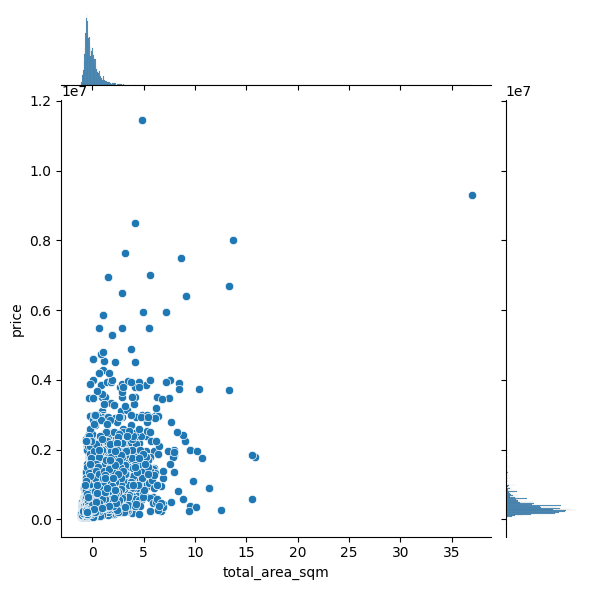

In [166]:
import seaborn as sns
import numpy as np
#total_area_sqm  = properties['total_area_sqm '].sum()

y = np.array(properties['price'])
X = np.array(properties['total_area_sqm']).reshape(-1, 1)
sns.jointplot(x="total_area_sqm",y="price",data=properties)

In [167]:
# Calculate the correlation coefficient between X and y
# Using numpy's corrcoef requires the 1D array, so we flatten X
correlation = np.corrcoef(X.flatten(), y)[0, 1]

correlation

0.5656019478358651

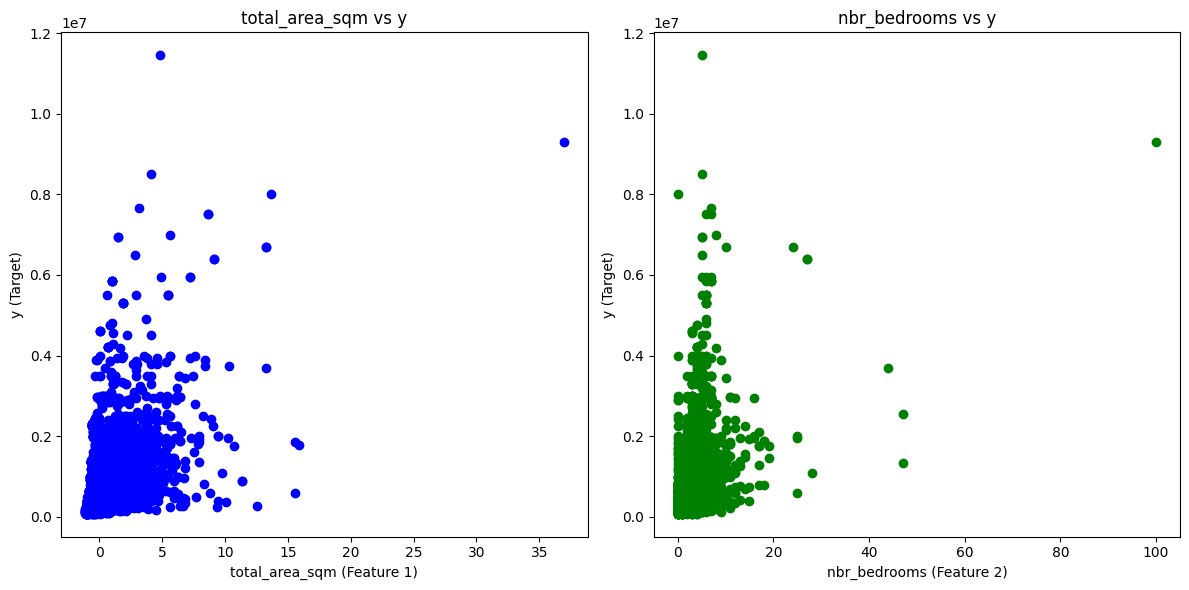

In [168]:

import pandas as pd

properties = pd.read_csv(r"data\cleaned\properties.csv")

# Prepare the feature and target variables
X = properties[['total_area_sqm', 'nbr_bedrooms']]
y = properties['price']

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot for x_1 vs y
axs[0].scatter(X['total_area_sqm'], y, color='blue', marker='o')
axs[0].set_title('total_area_sqm vs y')
axs[0].set_xlabel('total_area_sqm (Feature 1)')
axs[0].set_ylabel('y (Target)')

# Scatter plot for x_2 vs y
axs[1].scatter(X['nbr_bedrooms'], y, color='green', marker='o')
axs[1].set_title('nbr_bedrooms vs y')
axs[1].set_xlabel('nbr_bedrooms (Feature 2)')
axs[1].set_ylabel('y (Target)')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

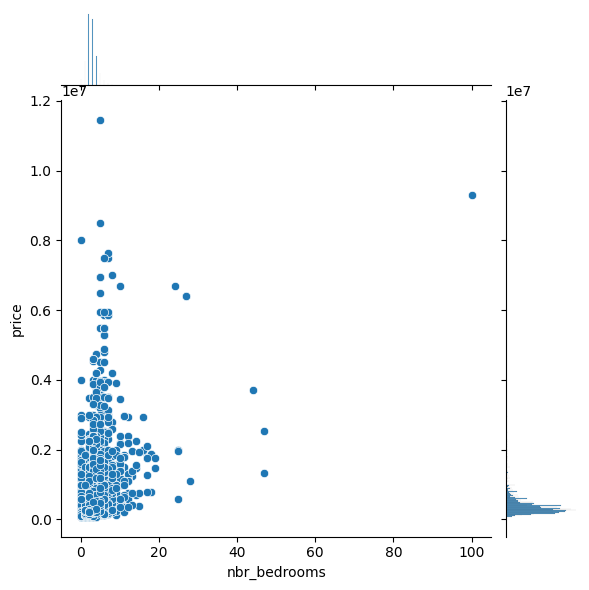

In [169]:
import seaborn as sns
import numpy as np
#total_nbr_bedrooms  = properties['nbr_bedrooms'].sum()

y = np.array(properties['price'])
X = np.array(properties['nbr_bedrooms']).reshape(-1, 1)
sns.jointplot(x="nbr_bedrooms",y="price",data=properties)


In [170]:
# Calculate the correlation coefficient between X and y
# Using numpy's corrcoef requires the 1D array, so we flatten X
correlation = np.corrcoef(X.flatten(), y)[0, 1]

correlation

0.40361442229383665

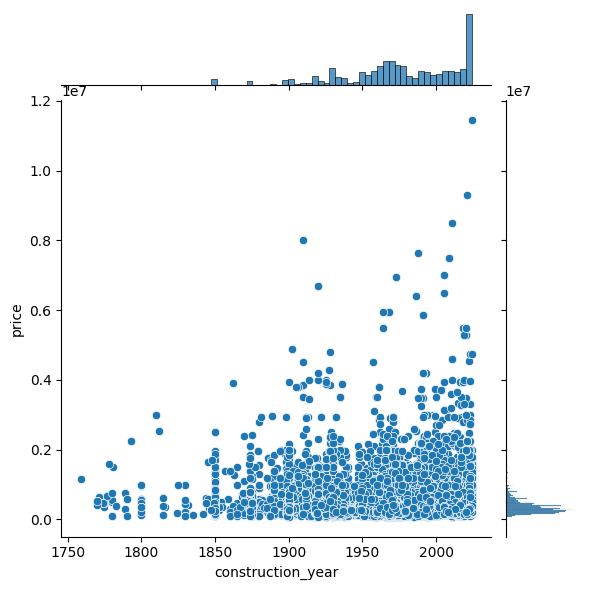

In [171]:


import seaborn as sns
import numpy as np

y = np.array(properties['price'])
X = np.array(properties['construction_year']).reshape(-1, 1)
sns.jointplot(x="construction_year",y="price",data=properties)

In [172]:
# Calculate the correlation coefficient between X and y
# Using numpy's corrcoef requires the 1D array, so we flatten X
correlation = np.corrcoef(X.flatten(), y)[0, 1]

correlation

0.014991570524583666

In [173]:
properties['price_per_sqm'] = properties['price'] / properties['total_area_sqm']
properties.price_per_sqm = properties.price_per_sqm.round(2)
properties.head()

,id,price,zip_code,construction_year,total_area_sqm,nbr_bedrooms,equipped_kitchen,fl_furnished,terrace_sqm,garden_sqm,...,province_East Flanders,province_Flemish Brabant,province_Hainaut,province_Limburg,province_Liège,province_Luxembourg,province_Namur,province_Walloon Brabant,province_West Flanders,price_per_sqm
0,34221000,225000.0,2050,1963.0,-0.463249,2,INSTALLED,0,-0.208716,-0.135719,...,False,False,False,False,False,False,False,False,False,-485700.20
1,58496000,501000.0,2275,2024.0,0.200771,3,MISSING,0,-0.328667,-0.135719,...,False,False,False,False,False,False,False,False,False,2495376.27
2,48727000,982700.0,1410,2022.0,0.063388,2,HYPER_EQUIPPED,0,0.151135,-0.024745,...,False,False,False,False,False,False,False,True,False,15502966.89
3,58028000,3500000.0,8300,1935.0,0.887689,6,MISSING,0,-0.328667,-0.135719,...,False,False,False,False,False,False,False,False,True,3942824.01
4,10079000,549000.0,9240,2001.0,0.185506,4,HYPER_EQUIPPED,0,-0.328667,-0.135719,...,True,False,False,False,False,False,False,False,False,2959465.09


In [174]:
avg_price=properties[['price']].mean()
print(avg_price)
median_price=properties[['price']].median()
print(median_price)

avg_total_area_sqm=properties[['total_area_sqm']].mean()
print(avg_total_area_sqm)




price    451790.411167
dtype: float64
price    330000.0
dtype: float64
total_area_sqm    1.369193e-17
dtype: float64


R² Score: 0.29720474562622634
Mean Squared Error: 143272177397.9597


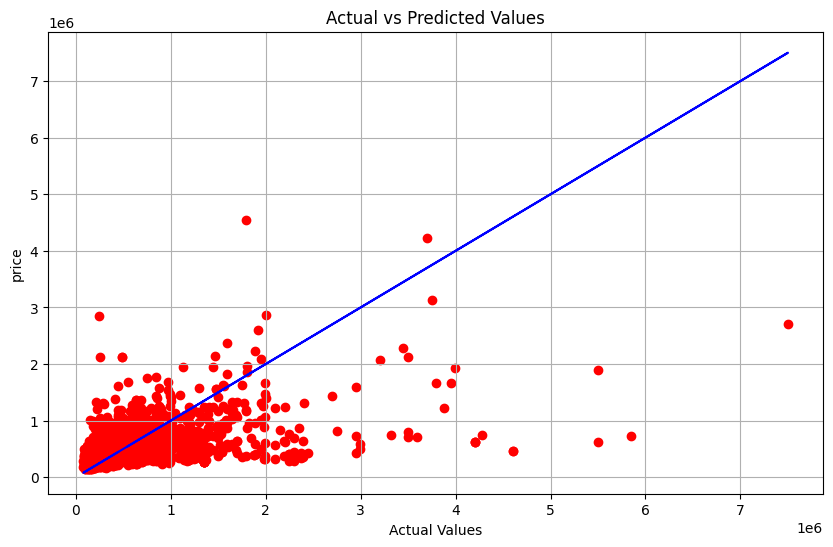

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Create a DataFrame from your data (assuming data is in a CSV format)
properties = pd.read_csv(r"data\cleaned\properties.csv")


# Split the data into features and target variable
X = properties[['nbr_bedrooms','total_area_sqm']]
y = properties['price']


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'R² Score: {r2}')
print(f'Mean Squared Error: {mse}')

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='red')  # Actual vs Predicted
plt.plot(y_test, y_test, color='blue')  # Diagonal line for perfect predictions
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("price")
plt.grid()
plt.show()




In [176]:
#Make predictions

y_pred = model.predict(X_test)


# Evaluate the model

mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

rmse = mse ** 0.5



print("Mean Absolute Error (MAE):", mae)

print("Mean Squared Error (MSE):", mse)

print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 186480.18928639265
Mean Squared Error (MSE): 143272177397.9597
Root Mean Squared Error (RMSE): 378513.11390486814


In [177]:
# Prepare features and target
X = properties[['nbr_bedrooms','total_area_sqm','construction_year']]
y = properties['price']


# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute accuracy metrics
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared

# Display results
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 139011903422.77365
R-squared: 0.3181027342411147


In [178]:
#Display model coefficients to understand feature importance

coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})

print(coefficients)

             Feature    Coefficient
0       nbr_bedrooms   12336.858364
1     total_area_sqm  266475.534360
2  construction_year    1555.017804


<Axes: >

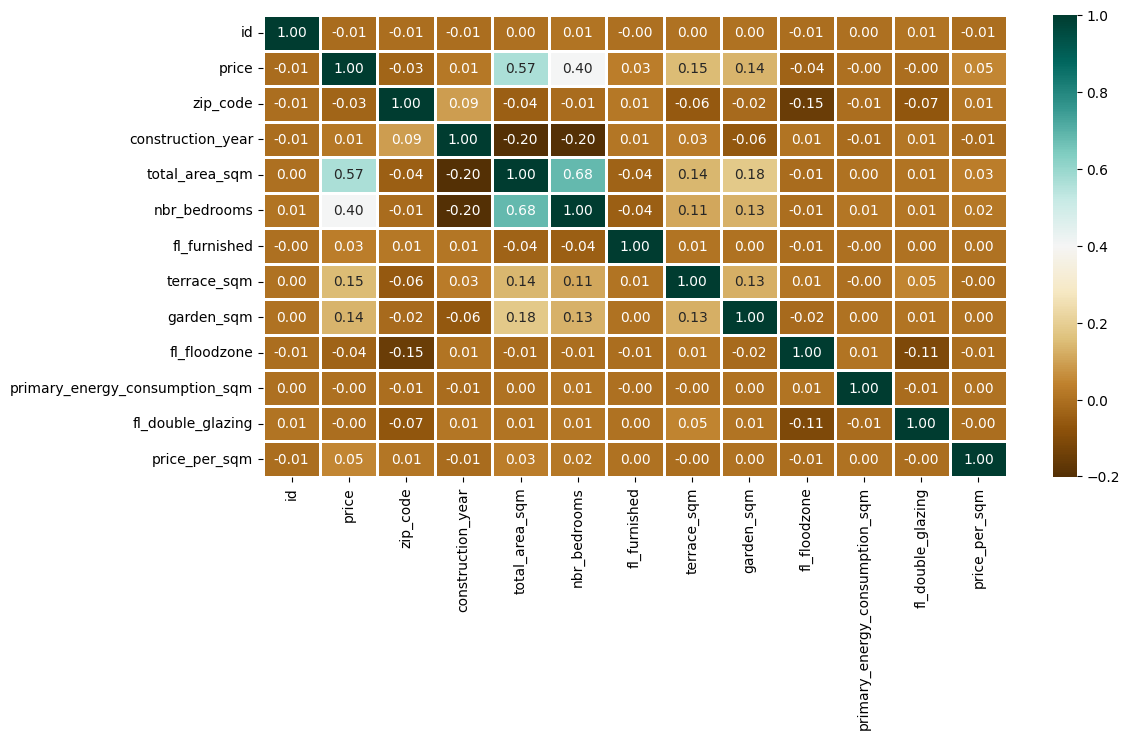

In [179]:
# Select only numerical features for correlation analysis
numerical_dataset = properties.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)


